# Recurrent Neural Networks



RNN's are complex and come in many different forms so in this tutorial we wil focus on how they work and the kind of problems they are best suited for.

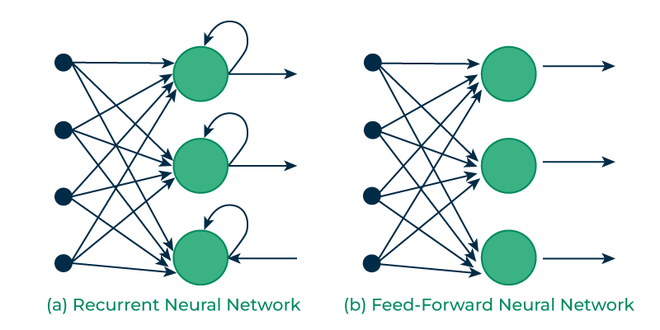

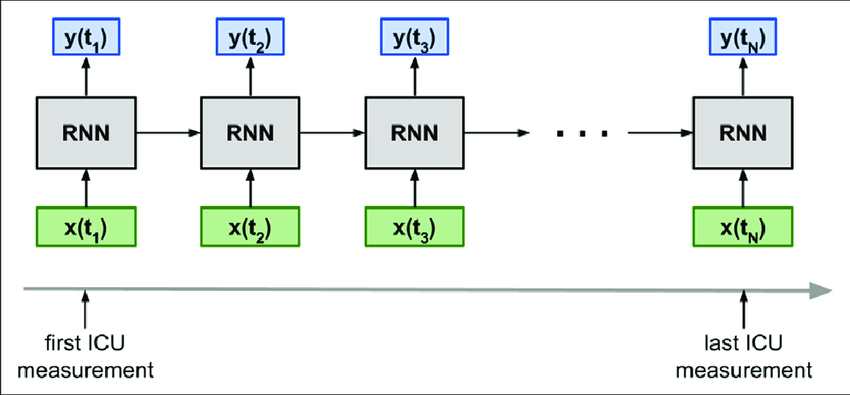

![alt text](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/RNN-unrolled.png)
*Source: https://colah.github.io/posts/2015-08-Understanding-LSTMs/*

Let's define what all these variables stand for before we get into the explination.

**h<sub>t</sub>** output at time t

**x<sub>t</sub>** input at time t

**A** Recurrent Layer (loop)

What this diagram is trying to illustrate is that a recurrent layer processes words or input one at a time in a combination with the output from the previous iteration. So, as we progress further in the input sequence, we build a more complex understanding of the text as a whole.

What we've just looked at is called a **simple RNN layer**. It can be effective at processing shorter sequences of text for simple problems but has many downfalls associated with it. One of them being the fact that as text sequences get longer it gets increasingly difficult for the network to understand the text properly.



## Sequence Data
 
We are working with text data, but neural networks require numeric data inputs. Unlike earlier when we were working with images, text cannot be easily converted into numbers.

We thus have to encode text data into numerical representation

## Encoding Text

Link: https://www.tensorflow.org/text/guide/word_embeddings

There are a few methodes to encode text:

###  1. Bag of Words
The first and simplest way to encode our data is to use something called **bag of words**. This is a pretty easy technique where each word in a sentence is encoded with an integer and thrown into a collection that does not maintain the order of the words but does keep track of the frequency. Have a look at the python function below that encodes a string of text into bag of words.

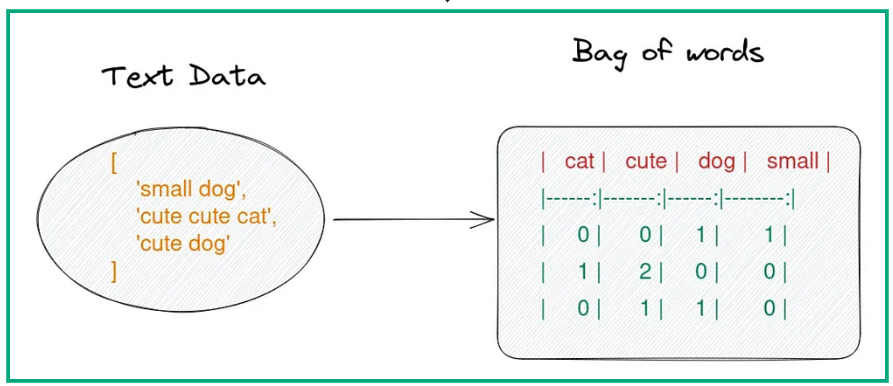

In [1]:
vocab = {}  # maps word to integer representing it
word_encoding = 1
def bag_of_words(text):
  global word_encoding

  words = text.lower().split(" ")  # create a list of all of the words in the text, well assume there is no grammar in our text for this example
  bag = {}  # stores all of the encodings and their frequency

  for word in words:
    if word in vocab:
      encoding = vocab[word]  # get encoding from vocab
    else:
      vocab[word] = word_encoding
      encoding = word_encoding
      word_encoding += 1

    if encoding in bag:
      bag[encoding] += 1
    else:
      bag[encoding] = 1

  return bag

text = "this is a test to see if this test will work is is test a a"
bag = bag_of_words(text)
print(bag)
print(vocab)

{1: 2, 2: 3, 3: 3, 4: 3, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1}
{'this': 1, 'is': 2, 'a': 3, 'test': 4, 'to': 5, 'see': 6, 'if': 7, 'will': 8, 'work': 9}


This isn't really the way we would do this in practice, but I hope it gives you an idea of how bag of words works. Notice that we've lost the order in which words appear. In fact, let's look at how this encoding works for the two sentences we showed above.



In [2]:
positive_review = "I thought the movie was going to be bad but it was actually amazing"
negative_review = "I thought the movie was going to be amazing but it was actually bad"

pos_bag = bag_of_words(positive_review)
neg_bag = bag_of_words(negative_review)

print("Positive:", pos_bag)
print("Negative:", neg_bag)

Positive: {10: 1, 11: 1, 12: 1, 13: 1, 14: 2, 15: 1, 5: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1}
Negative: {10: 1, 11: 1, 12: 1, 13: 1, 14: 2, 15: 1, 5: 1, 16: 1, 21: 1, 18: 1, 19: 1, 20: 1, 17: 1}


We can see that even though these sentences have a very different meaning they are encoded exaclty the same way. Obviously, this isn't going to fly. Let's look at some other methods.



### 2. Integer Encoding
The next technique we will look at is called **integer encoding**. This involves representing each word or character in a sentence as a unique integer and maintaining the order of these words. This should hopefully fix the problem we saw before were we lost the order of words. We will be using **one-hot encoding**.


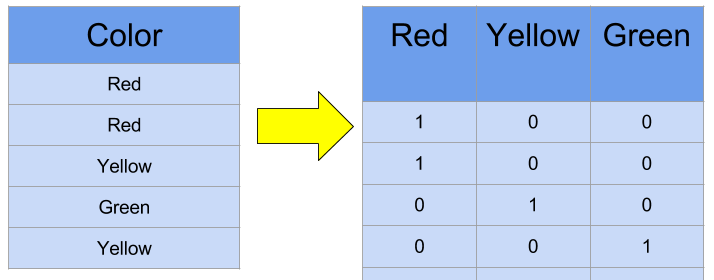

In [3]:
vocab = {}
word_encoding = 1
def one_hot_encoding(text):
  global word_encoding

  words = text.lower().split(" ")
  encoding = []

  for word in words:
    if word in vocab:
      code = vocab[word]
      encoding.append(code)
    else:
      vocab[word] = word_encoding
      encoding.append(word_encoding)
      word_encoding += 1

  return encoding

text = "this is a test to see if this test will work is is test a a"
encoding = one_hot_encoding(text)
print(encoding)
print(vocab)

[1, 2, 3, 4, 5, 6, 7, 1, 4, 8, 9, 2, 2, 4, 3, 3]
{'this': 1, 'is': 2, 'a': 3, 'test': 4, 'to': 5, 'see': 6, 'if': 7, 'will': 8, 'work': 9}


And now let's have a look at one hot encoding on our movie reviews.

In [4]:
positive_review = "I thought the movie was going to be bad but it was actually amazing"
negative_review = "I thought the movie was going to be amazing but it was actually bad"

pos_encode = one_hot_encoding(positive_review)
neg_encode = one_hot_encoding(negative_review)

print("Positive:", pos_encode)
print("Negative:", neg_encode)

Positive: [10, 11, 12, 13, 14, 15, 5, 16, 17, 18, 19, 14, 20, 21]
Negative: [10, 11, 12, 13, 14, 15, 5, 16, 21, 18, 19, 14, 20, 17]


###  3. Word Embeddings

This method keeps the order of words intact as well as encodes similar words with very similar labels. It attempts to not only encode the frequency and order of words but the meaning of those words in the sentence. It encodes each word as a dense vector that represents its context in the sentence.

Unlike the previous techniques word embeddings are learned by looking at many different training examples. You can add what's called an *embedding layer* to the beggining of your model and while your model trains your embedding layer will learn the correct embeddings for words. You can also use pretrained embedding layers.

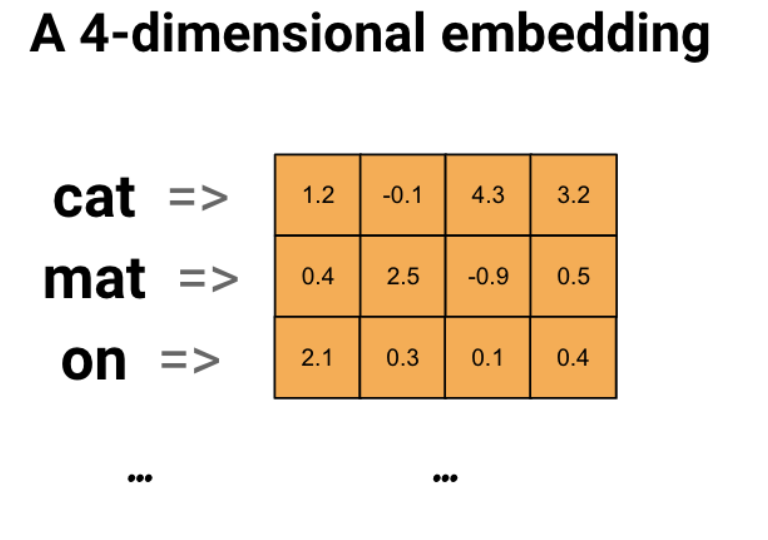



# LSTM

Link: https://www.youtube.com/watch?v=LfnrRPFhkuY

The layer we dicussed in depth above was called a *simpleRNN*. However, there does exist some other recurrent layers (layers that contain a loop) that work much better than a simple RNN layer. The one we will talk about here is called LSTM (Long Short-Term Memory). This layer works very similarily to the simpleRNN layer but adds a way to access inputs from any timestep in the past. Whereas in our simple RNN layer input from previous timestamps gradually disappeared as we got further through the input. With a LSTM we have a long-term memory data structure storing all the previously seen inputs as well as when we saw them. This allows for us to access any previous value we want at any point in time. This adds to the complexity of our network and allows it to discover more useful relationships between inputs and when they appear.

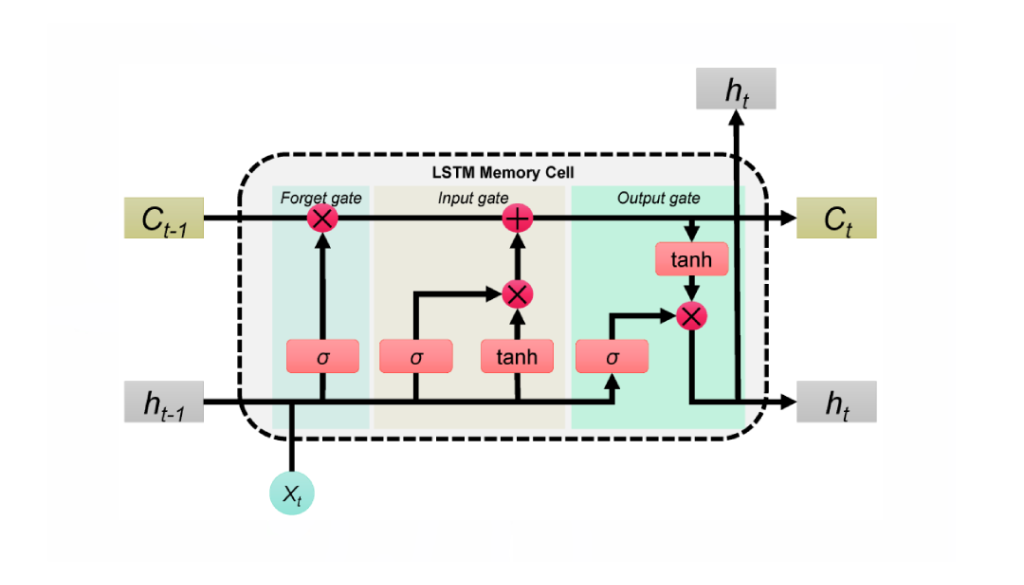

Long Short-Term Memory (LSTM) is a type of recurrent neural network (RNN) architecture specifically designed to address the vanishing gradient problem in traditional RNNs. LSTMs are particularly effective in learning and remembering over long sequences of data. The picture provided illustrates the architecture of an LSTM memory cell, which consists of several gates and states.

Here's a brief explanation using the provided image:

1. **Inputs to the LSTM Cell:**
   - \( x_t \): Input at the current time step.
   - \( h_{t-1} \): Hidden state from the previous time step.
   - \( C_{t-1} \): Cell state from the previous time step.

2. **Forget Gate (\( f_t \)):**
   - The forget gate decides which information from the previous cell state \( C_{t-1} \) to forget. It uses a sigmoid activation function (σ) to output a value between 0 and 1, where 1 means completely keep this information, and 0 means completely forget it.

3. **Input Gate (\( i_t \)):**
   - The input gate determines which new information to store in the cell state. It uses a sigmoid activation function to decide which values to update, and a tanh activation function to create new candidate values \( \tilde{C_t} \) that could be added to the cell state.

4. **Cell State Update:**
   - The new cell state \( C_t \) is computed by combining the old cell state \( C_{t-1} \) multiplied by the forget gate output \( f_t \) and the new candidate values \( \tilde{C_t} \) scaled by the input gate output \( i_t \).

5. **Output Gate (\( o_t \)):**
   - The output gate decides what the next hidden state \( h_t \) should be. It uses a sigmoid activation function to decide which parts of the cell state to output, combined with a tanh activation function to scale the cell state values.

6. **Outputs from the LSTM Cell:**
   - \( C_t \): The updated cell state that carries the memory.
   - \( h_t \): The hidden state output for the current time step, which also serves as the input for the next time step.

# GRU

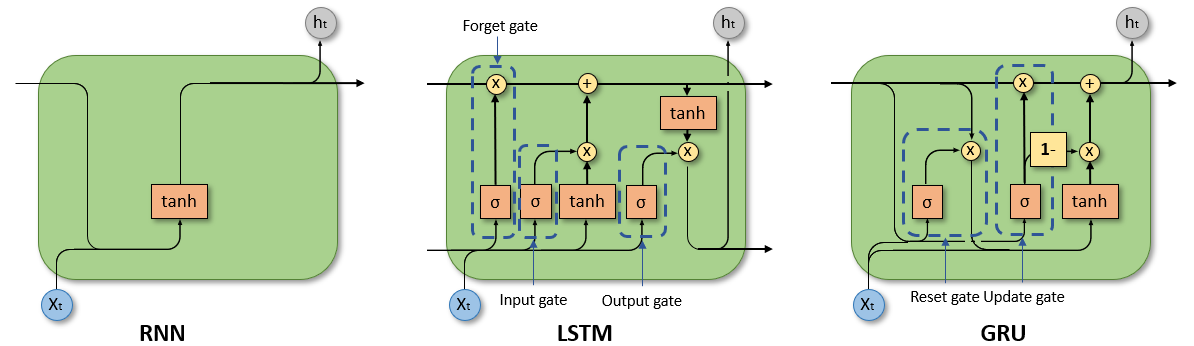

Link: https://www.youtube.com/watch?v=tOuXgORsXJ4

Gated Recurrent Unit (GRU) is a type of recurrent neural network (RNN) architecture that is designed to address the vanishing gradient problem and is simpler than Long Short-Term Memory (LSTM) units. GRUs have fewer parameters and are computationally more efficient while maintaining comparable performance to LSTMs in many tasks. Here's a brief explanation of the GRU architecture:

### Key Components of GRU:

1. **Inputs to the GRU Cell:**
   - \( x_t \): Input at the current time step.
   - \( h_{t-1} \): Hidden state from the previous time step.

2. **Reset Gate (\( r_t \)):**
   - The reset gate decides how much of the previous hidden state \( h_{t-1} \) to forget. It uses a sigmoid activation function (σ) to output values between 0 and 1. When \( r_t \) is close to 0, it effectively forgets the previous hidden state, and when it is close to 1, it retains the previous hidden state.

3. **Update Gate (\( z_t \)):**
   - The update gate determines how much of the previous hidden state \( h_{t-1} \) and the new candidate hidden state \( \tilde{h_t} \) should be mixed to form the new hidden state \( h_t \). It also uses a sigmoid activation function to output values between 0 and 1. This gate controls the balance between the old state and the new state.

4. **Candidate Hidden State (\( \tilde{h_t} \)):**
   - The candidate hidden state is computed using the current input \( x_t \) and the reset gate \( r_t \). It involves element-wise multiplication of the reset gate output \( r_t \) and the previous hidden state \( h_{t-1} \). This is then passed through a tanh activation function to produce the candidate hidden state.

5. **New Hidden State (\( h_t \)):**
   - The new hidden state \( h_t \) is a combination of the previous hidden state \( h_{t-1} \) and the candidate hidden state \( \tilde{h_t} \). The update gate \( z_t \) controls this combination:
     \[
     h_t = (1 - z_t) \cdot \tilde{h_t} + z_t \cdot h_{t-1}
     \]
   - Here, \( z_t \) determines how much of the previous hidden state \( h_{t-1} \) to retain and how much of the candidate hidden state \( \tilde{h_t} \) to use.



GRUs are often preferred over LSTMs when computational efficiency is a concern because they have fewer parameters and can be faster to train while still effectively capturing long-term dependencies in sequential data.

## Sentiment Analysis
And now time to see a recurrent neural network in action. For this example, we are going to do something called sentiment analysis.

The formal definition of this term from Wikipedia is as follows:

*the process of computationally identifying and categorizing opinions expressed in a piece of text, especially in order to determine whether the writer's attitude towards a particular topic, product, etc. is positive, negative, or neutral.*

The example we’ll use here is classifying movie reviews as either postive, negative or neutral.

*This guide is based on the following tensorflow tutorial: https://www.tensorflow.org/tutorials/text/text_classification_rnn*



### Movie Review Dataset
Well start by loading in the IMDB movie review dataset from keras. This dataset contains 25,000 reviews from IMDB where each one is already preprocessed and has a label as either positive or negative. Each review is encoded by integers that represents how common a word is in the entire dataset. For example, a word encoded by the integer 3 means that it is the 3rd most common word in the dataset.





In [11]:
from keras.datasets import imdb
from keras.preprocessing import sequence
import keras
import tensorflow as tf
import os
import numpy as np

VOCAB_SIZE = 88584

MAXLEN = 250
BATCH_SIZE = 64

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = VOCAB_SIZE)

In [13]:
# Lets look at one review
train_data[1]

[1,
 194,
 1153,
 194,
 8255,
 78,
 228,
 5,
 6,
 1463,
 4369,
 5012,
 134,
 26,
 4,
 715,
 8,
 118,
 1634,
 14,
 394,
 20,
 13,
 119,
 954,
 189,
 102,
 5,
 207,
 110,
 3103,
 21,
 14,
 69,
 188,
 8,
 30,
 23,
 7,
 4,
 249,
 126,
 93,
 4,
 114,
 9,
 2300,
 1523,
 5,
 647,
 4,
 116,
 9,
 35,
 8163,
 4,
 229,
 9,
 340,
 1322,
 4,
 118,
 9,
 4,
 130,
 4901,
 19,
 4,
 1002,
 5,
 89,
 29,
 952,
 46,
 37,
 4,
 455,
 9,
 45,
 43,
 38,
 1543,
 1905,
 398,
 4,
 1649,
 26,
 6853,
 5,
 163,
 11,
 3215,
 10156,
 4,
 1153,
 9,
 194,
 775,
 7,
 8255,
 11596,
 349,
 2637,
 148,
 605,
 15358,
 8003,
 15,
 123,
 125,
 68,
 23141,
 6853,
 15,
 349,
 165,
 4362,
 98,
 5,
 4,
 228,
 9,
 43,
 36893,
 1157,
 15,
 299,
 120,
 5,
 120,
 174,
 11,
 220,
 175,
 136,
 50,
 9,
 4373,
 228,
 8255,
 5,
 25249,
 656,
 245,
 2350,
 5,
 4,
 9837,
 131,
 152,
 491,
 18,
 46151,
 32,
 7464,
 1212,
 14,
 9,
 6,
 371,
 78,
 22,
 625,
 64,
 1382,
 9,
 8,
 168,
 145,
 23,
 4,
 1690,
 15,
 16,
 4,
 1355,
 5,
 28,
 6,
 52,
 

### More Preprocessing
If we have a look at some of our loaded in reviews, we'll notice that they are different lengths. This is an issue. We cannot pass different length data into our neural network. Therefore, we must make each review the same length. To do this we will follow the procedure below:
- if the review is greater than 250 words then trim off the extra words
- if the review is less than 250 words add the necessary amount of 0's to make it equal to 250.

Luckily for us keras has a function that can do this for us:




In [14]:
train_data = sequence.pad_sequences(train_data, MAXLEN)
test_data = sequence.pad_sequences(test_data, MAXLEN)

## Creating the Model
Now it's time to create the model. We'll use a word embedding layer as the first layer in our model and add a LSTM layer afterwards that feeds into a dense node to get our predicted sentiment.

32 stands for the output dimension of the vectors generated by the embedding layer. We can change this value if we'd like!

### Tensorflow-Keras Layers:

#### 1. tf.keras.layers.RNN ()
Link: https://www.tensorflow.org/api_docs/python/tf/keras/layers/RNN

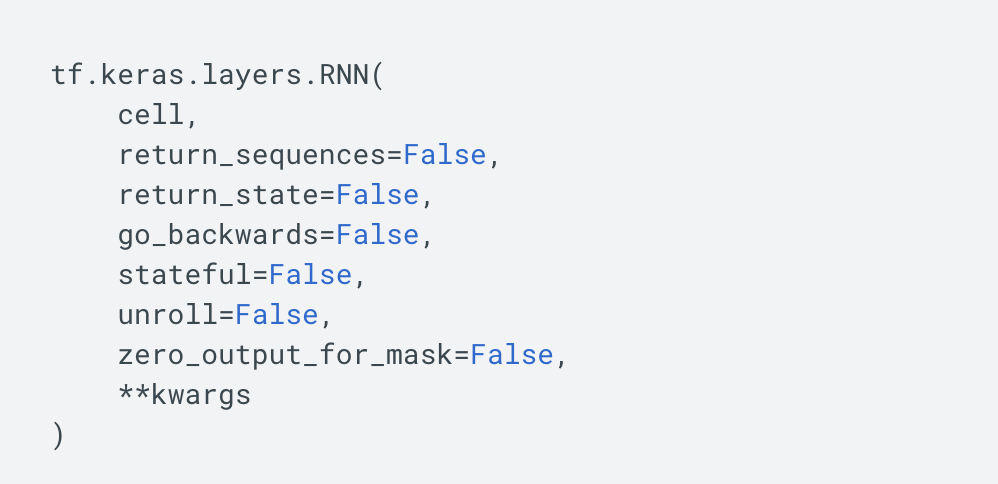

#### 2. tf.keras.layers.LSTM ()
Link: https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM

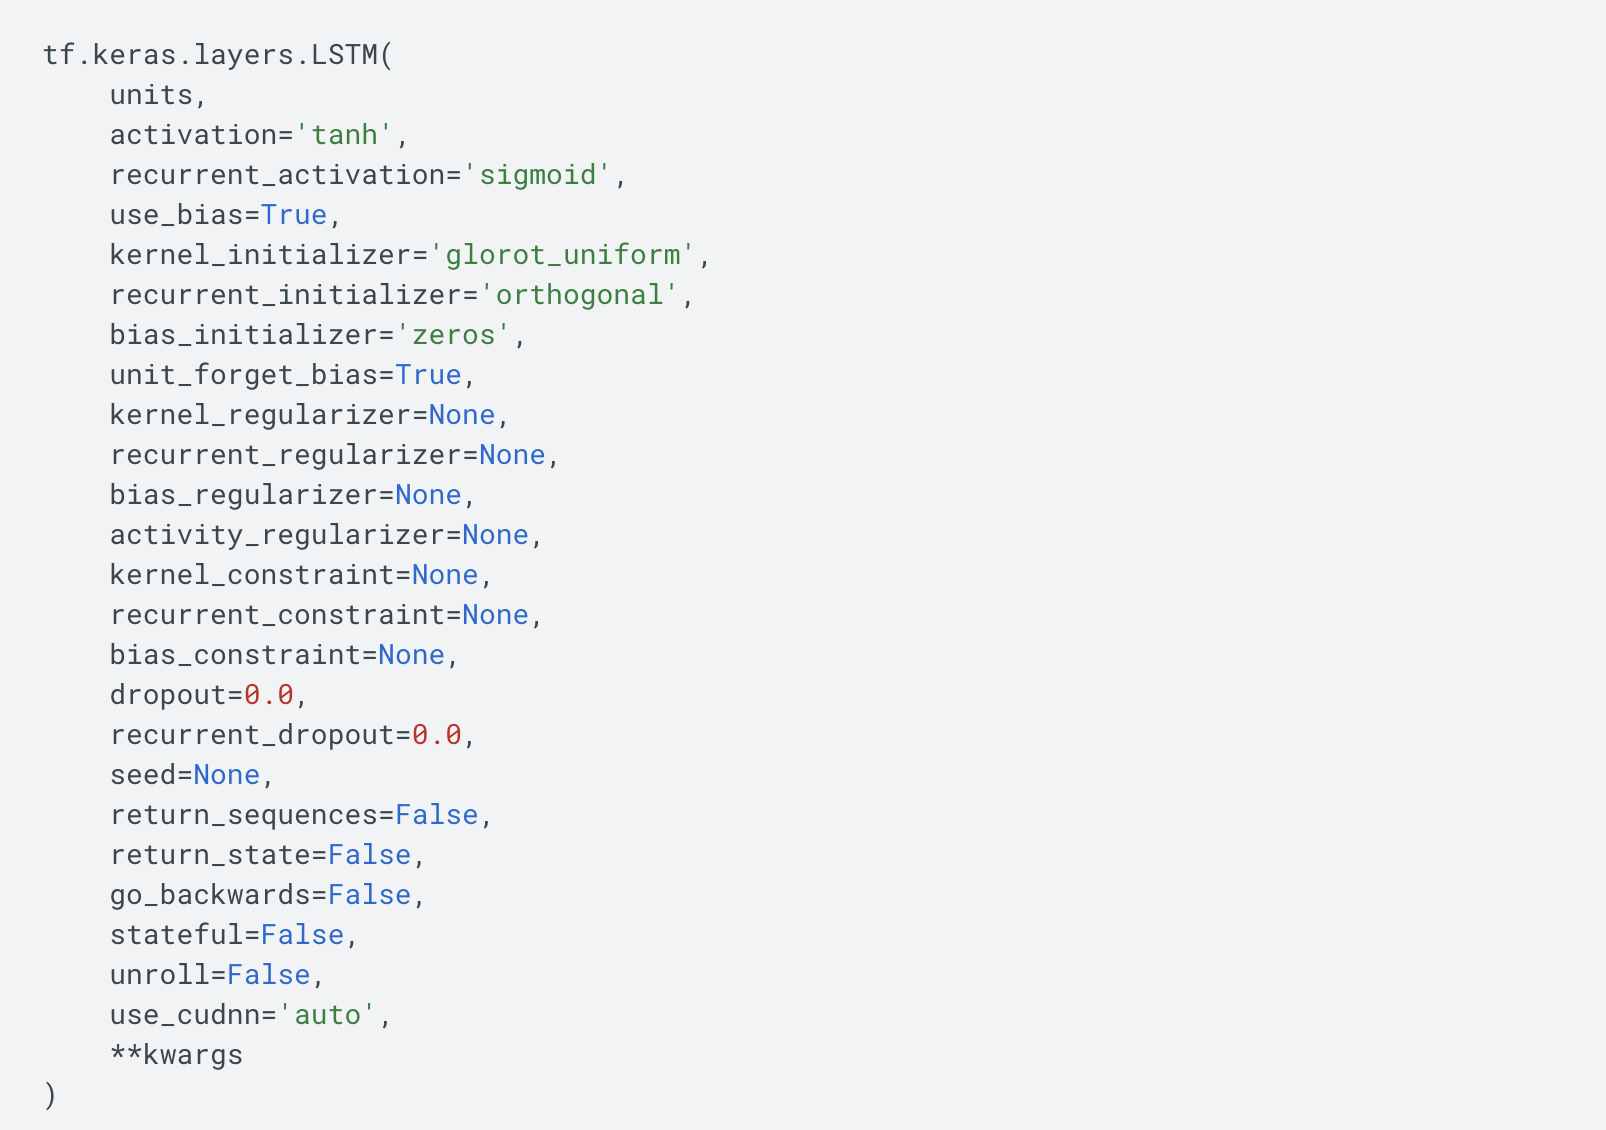

#### 3. tf.keras.layers.GRU()
Link: https://www.tensorflow.org/api_docs/python/tf/keras/layers/GRU

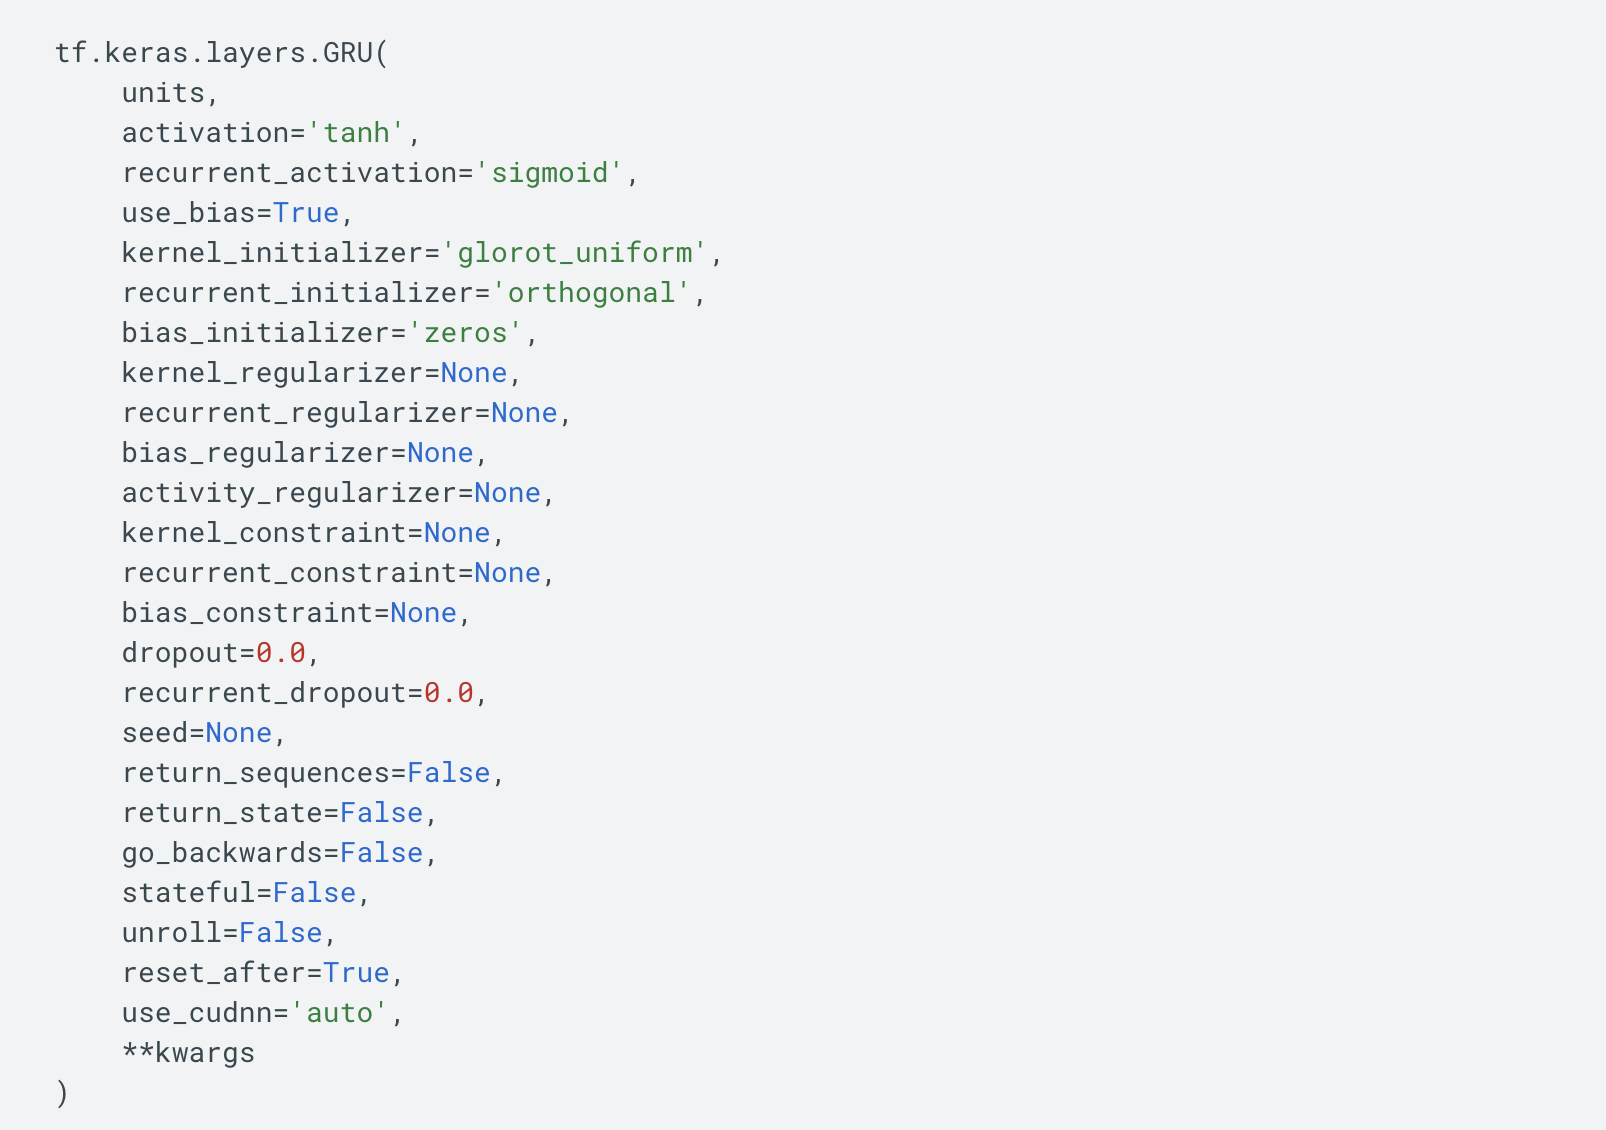

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, 32),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Training
Now it's time to compile and train the model.

In [17]:
model.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=['acc'])

history = model.fit(train_data, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 49ms/step - acc: 0.6647 - loss: 0.5791 - val_acc: 0.8570 - val_loss: 0.3387
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - acc: 0.8879 - loss: 0.2810 - val_acc: 0.8548 - val_loss: 0.3391
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - acc: 0.9201 - loss: 0.2174 - val_acc: 0.8446 - val_loss: 0.3470
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 50ms/step - acc: 0.9337 - loss: 0.1758 - val_acc: 0.8850 - val_loss: 0.2869
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - acc: 0.9460 - loss: 0.1499 - val_acc: 0.8678 - val_loss: 0.3225
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - acc: 0.9568 - loss: 0.1260 - val_acc: 0.8646 - val_loss: 0.3064
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - acc: 0.9641 - loss: 0.1041 - val_acc: 0.8676 - val_loss: 0.4609
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - acc: 0.9693 - loss: 0.0946 - val_acc: 0.8800 - val_loss: 0.3483
Epoch 9/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 

And we'll evaluate the model on our training data to see how well it performs.

In [18]:
results = model.evaluate(test_data, test_labels)
print(results)

782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - acc: 0.8598 - loss: 0.5173
[0.5224175453186035, 0.860480010509491]


So we're scoring somewhere in the mid-high 80's. Not bad for a simple recurrent network.